In [41]:
import pandas as pd
import numpy as np
import math
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

c:\users\i509737\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [27]:
sensor_data = pd.read_csv("sensor.csv")
sensor_data = sensor_data.dropna()
#print(sensor_data)

In [30]:
col_names = sensor_data.columns
#print(col_names)
indep_vars = col_names[1:52]
depep_vars = col_names[52]

In [31]:
X = sensor_data[indep_vars]
y = sensor_data[depep_vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [32]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [40]:
metrics.confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

array([[23286,     3],
       [    4,   527]], dtype=int64)

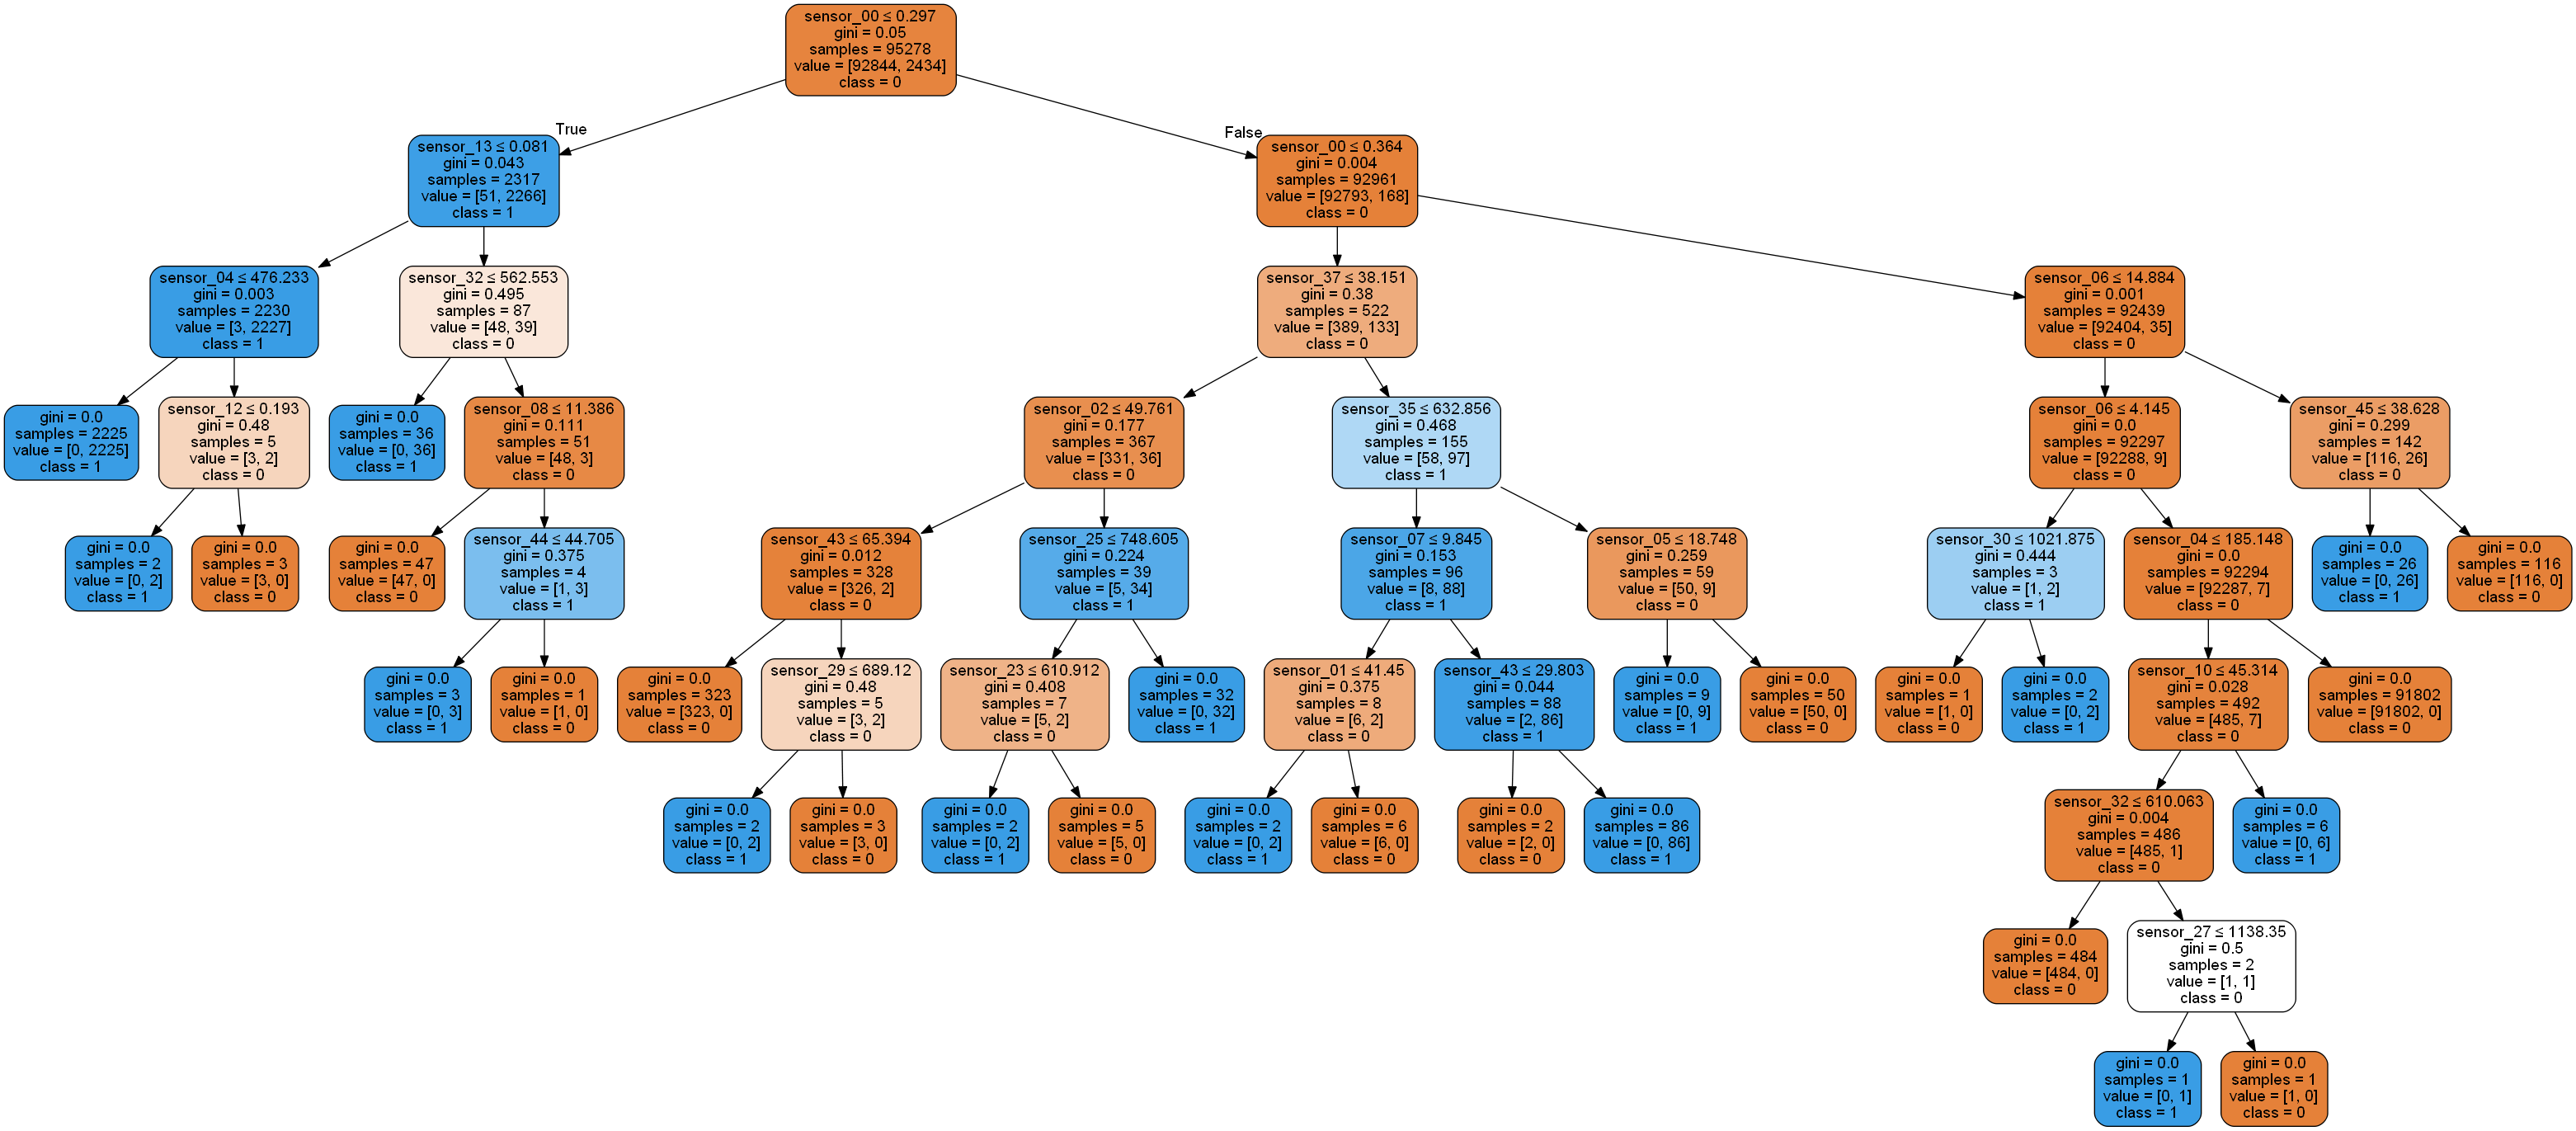

In [42]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = indep_vars,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())